In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set(style='whitegrid')

In [9]:
df = pd.read_csv('../data/merged_orders_products.csv')

In [17]:
#creating user product matrix
user_product = df.pivot_table(index='customer_id', columns='product_name',values='quantity',aggfunc='sum',fill_value=0)

print('User-Product Matrix Shape: ',user_product.shape)

User-Product Matrix Shape:  (2172, 51)


In [19]:
#normalise data
scaler = StandardScaler()
user_product_scaled = scaler.fit_transform(user_product)

In [21]:
#applying PCA
pca = PCA(n_components=2)
user_product_pca = pca.fit_transform(user_product_scaled)

In [23]:
#elbow method to choose optimal 'k'
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(user_product_scaled)
    wcss.append(kmeans.inertia_)

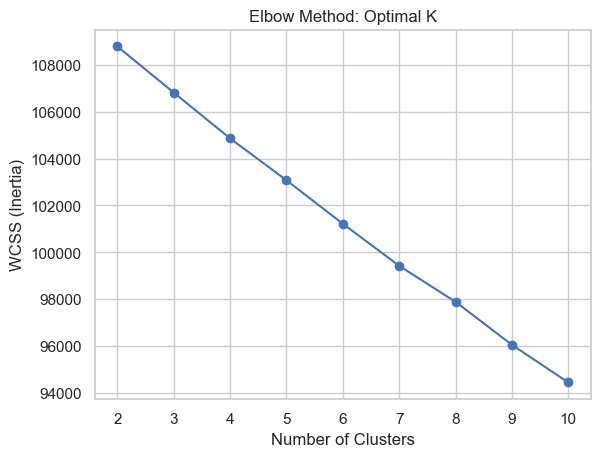

In [25]:
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method: Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

In [27]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k,random_state=42)
clusters = kmeans.fit_predict(user_product_scaled)

In [29]:
user_product['cluster'] = clusters

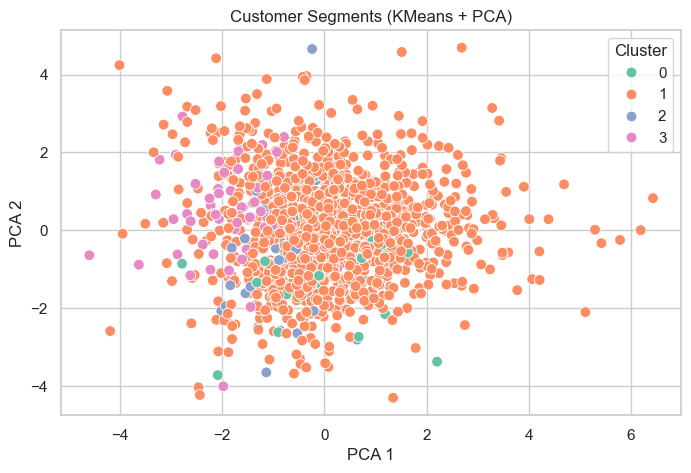

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = user_product_pca[:,0], y=user_product_pca[:,1],hue=clusters,palette='Set2',s=60)
plt.title("Customer Segments (KMeans + PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

In [33]:
cluster_summary = user_product.groupby('cluster').mean()
print('Average Product purchses per cluster: ')
cluster_summary

Average Product purchses per cluster: 


product_name,Baby Food,Baby Wipes,Bananas,Biscuits,Bread,Butter,Carrots,Cat Food,Cereal,Cheese,Chips,Chocolates,Cola,Cookies,Cough Syrup,Curd,Detergent,Diapers,Dish Soap,Dog Food,Eggs,Frozen Biryani,Frozen Pizza,Frozen Vegetables,Ice Cream,Iced Tea,Instant Noodles,Lemonade,Lotion,Mango Drink,Mangoes,Milk,Nuts,Onions,Orange Juice,Pain Reliever,Pet Treats,Popcorn,Potatoes,Pulses,Rice,Salt,Shampoo,Soap,Spinach,Sugar,Toilet Cleaner,Tomatoes,Toothpaste,Vitamins,Wheat Flour
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.184211,0.210526,0.026316,0.105263,0.131579,0.052632,0.236842,0.000000,0.000000,0.000000,0.000000,0.026316,0.105263,0.052632,0.131579,0.052632,0.184211,0.000000,0.000000,0.157895,0.052632,0.157895,0.078947,0.078947,0.000000,0.078947,0.078947,0.000000,0.105263,0.078947,0.000000,0.000000,0.026316,0.078947,0.131579,0.078947,0.131579,0.000000,0.078947,0.157895,2.473684,0.052632,0.078947,0.026316,0.000000,0.000000,0.105263,0.078947,0.052632,0.131579,0.157895
1,0.107090,0.153198,0.040159,0.117501,0.124442,0.069906,0.089241,0.146257,0.040654,0.084779,0.080813,0.009420,0.106594,0.043629,0.174517,0.059990,0.115022,0.044125,0.191373,0.106594,0.118989,0.118493,0.082300,0.065940,0.047595,0.055528,0.033218,0.020823,0.162618,0.064948,0.050074,0.023302,0.061477,0.101636,0.102132,0.014378,0.218642,0.083788,0.102628,0.130392,0.007437,0.054041,0.070897,0.085275,0.019336,0.083788,0.196827,0.045612,0.090233,0.182449,0.101140
2,0.209302,0.116279,0.000000,0.046512,0.000000,0.046512,0.046512,0.023256,0.069767,0.069767,0.093023,2.581395,0.000000,0.069767,0.186047,0.000000,0.116279,0.000000,0.162791,0.046512,0.000000,0.046512,0.116279,0.000000,0.000000,0.023256,0.000000,0.069767,0.209302,0.000000,0.000000,0.162791,0.046512,0.139535,0.069767,0.046512,0.162791,0.069767,0.162791,0.023256,0.000000,0.000000,0.069767,0.116279,0.000000,0.116279,0.302326,0.046512,0.069767,0.139535,0.000000
3,0.054054,0.081081,0.040541,0.054054,0.189189,0.040541,0.000000,0.148649,0.013514,0.108108,0.054054,0.000000,0.148649,0.054054,0.108108,0.040541,0.094595,0.027027,0.054054,0.000000,0.054054,0.094595,0.081081,0.013514,0.027027,0.027027,0.040541,0.000000,0.121622,0.121622,0.000000,0.027027,0.094595,0.108108,0.108108,2.513514,0.270270,0.148649,0.175676,0.040541,0.000000,0.067568,0.108108,0.108108,0.013514,0.135135,0.216216,0.000000,0.094595,0.013514,0.040541


In [35]:
user_product.reset_index().to_csv('../data/customer_segments.csv',index=False)
print('Customer segmentation saveda as customer_segments.csv')

Customer segmentation saveda as customer_segments.csv
